In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Task 1
## a)

In [2]:
rng = np.random.default_rng(123)

def generate_mixture(n=500, rng=rng):
    g = rng.binomial(1, p=0.7, size=n)
    return (1 - g) * rng.normal(1, 1, size=n) + g * rng.normal(5, np.sqrt(2), size=n)

def mixture_pdf(x, mu0, mu1, sigma0, sigma1, pi0, pi1):
    return pi0 * norm(mu0, sigma0).pdf(x) + pi1 * norm(mu1, sigma1).pdf(x)
    
linspace = np.linspace(-2, 10)
x = generate_mixture()

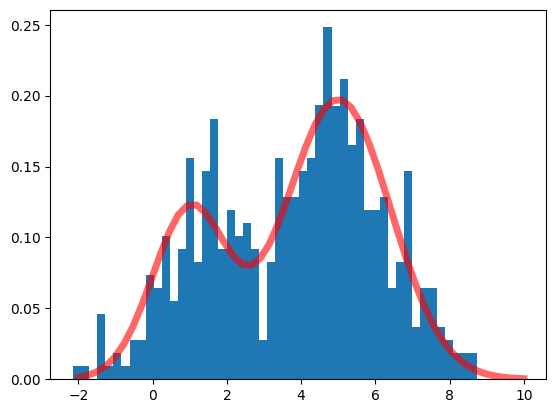

In [3]:
fig, ax = plt.subplots(1, 1)
ax.hist(x, bins=50, density=True)
ax.plot(linspace, mixture_pdf(linspace, 1, 5, 1, np.sqrt(2), 0.3, 0.7), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.show()

## d)

In [4]:
def e_step(x, mu0, mu1, sigma0, sigma1, pi0, pi1):
    gamma = (pi1 * norm(mu1, sigma1).pdf(x)) / (pi0 * norm(mu0, sigma0).pdf(x) + pi1 * norm(mu1, sigma1).pdf(x))
    return gamma

def m_step(x, mu0, mu1, sigma0, sigma1, pi0, pi1, gamma_hat):
    mu0_new= np.sum((1 - gamma_hat) * x) / np.sum(1 - gamma_hat)
    mu1_new = np.sum(gamma_hat * x) / np.sum(gamma_hat)
    sigma0_new = np.sqrt(np.sum((1 - gamma_hat) * np.power(x - mu0, 2)) / np.sum(1 - gamma_hat))
    sigma1_new = np.sqrt(np.sum(gamma_hat * np.power(x - mu1, 2)) / np.sum(gamma_hat))
    pi0_new = np.mean(1 - gamma_hat)
    pi1_new = np.mean(gamma_hat)
    return mu0_new, mu1_new, sigma0_new, sigma1_new, pi0_new, pi1_new


def em_algorithm(x, mu0, mu1, pi0, pi1, n_iter):
    results = []
    sigma0, sigma1 = np.std(x), np.std(x)
    for i in range(n_iter):
        gamma_hat = e_step(x, mu0, mu1, sigma0, sigma1, pi0, pi1)
        mu0, mu1, sigma0, sigma1, pi0, pi1 = m_step(x, mu0, mu1, sigma0, sigma1, pi0, pi1, gamma_hat)
        results += [(mu0, mu1, sigma0, sigma1, pi0, pi1)]
    return mu0, mu1, sigma0, sigma1, pi0, pi1, results
    

In [5]:
mu0, mu1 = np.mean(x) - np.std(x), np.mean(x) +  np.std(x)
mu0, mu1, sigma0, sigma1, pi0, pi1, history = em_algorithm(x, mu0, mu1, 0.5, 0.5, n_iter=50)
mu0, mu1, sigma0, sigma1, pi0, pi1

(1.2990849598592955,
 5.134656130700382,
 1.2377452799912865,
 1.389881407595325,
 0.35067847014183495,
 0.6493215298581649)

## f)

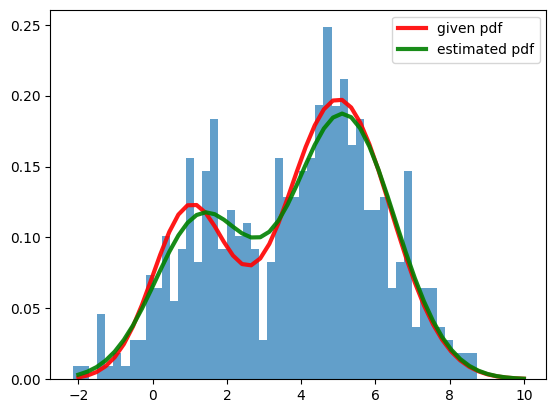

In [6]:
fig, ax = plt.subplots(1, 1)
ax.hist(x, bins=50, density=True, alpha=0.7)
ax.plot(linspace, mixture_pdf(linspace, 1, 5, 1, np.sqrt(2), 0.3, 0.7), 'r-', lw=3, alpha=0.9, label='given pdf')
ax.plot(linspace, mixture_pdf(linspace, mu0, mu1, sigma0, sigma1, pi0, pi1), 'g-', lw=3, alpha=0.9, label='estimated pdf')
ax.legend()
plt.show()

In [7]:
%matplotlib notebook

In [17]:
from matplotlib.animation import FuncAnimation

# Create a figure and axis
fig, ax = plt.subplots()
ax.hist(x, bins=50, density=True, alpha=0.7)
ax.plot(linspace, mixture_pdf(linspace, 1, 5, 1, np.sqrt(2), 0.3, 0.7), 'r-', lw=3, alpha=0.9, label='given pdf')
mu0, mu1, sigma0, sigma1, pi0, pi1 = history[0]
line, = ax.plot(linspace, mixture_pdf(linspace, mu0, mu1, sigma0, sigma1, pi0, pi1),'g-', label='estimated pdf', lw=3, alpha=0.9)
frame_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, ha='left')
ax.legend()

# Function to update the plot in each frame of the animation
def update(frame):
    # Update data for the line plot
    mu0, mu1, sigma0, sigma1, pi0, pi1 = history[frame]
    line.set_ydata(mixture_pdf(linspace, mu0, mu1, sigma0, sigma1, pi0, pi1))
    frame_text.set_text('Frame: {}'.format(frame))
    return line, frame_text

# Create the animation
ani = FuncAnimation(fig, update, frames=50, interval=200)

# Show the animation
plt.show()

<IPython.core.display.Javascript object>